In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

In [4]:
data = pd.read_csv('numerical_df.csv') 
data.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


array([[<Axes: title={'center': 'customer lifetime value'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'monthly premium auto'}>,
        <Axes: title={'center': 'months since last claim'}>],
       [<Axes: title={'center': 'months since policy inception'}>,
        <Axes: title={'center': 'number of open complaints'}>,
        <Axes: title={'center': 'number of policies'}>,
        <Axes: title={'center': 'total claim amount'}>]], dtype=object)

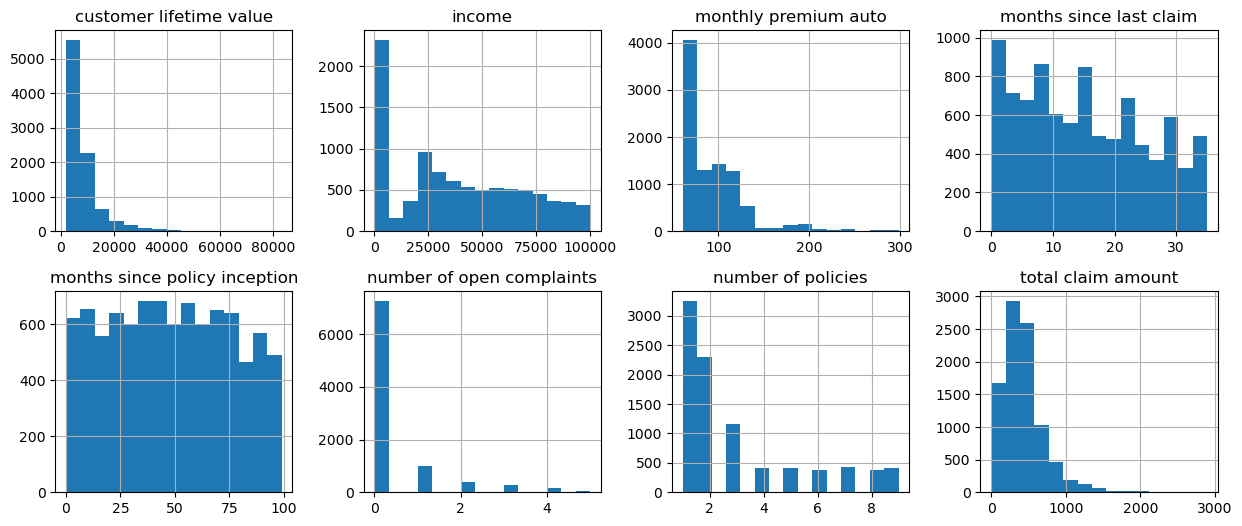

In [30]:
data.hist(bins=15, figsize=(15, 6), layout=(2, 4))

<Axes: >

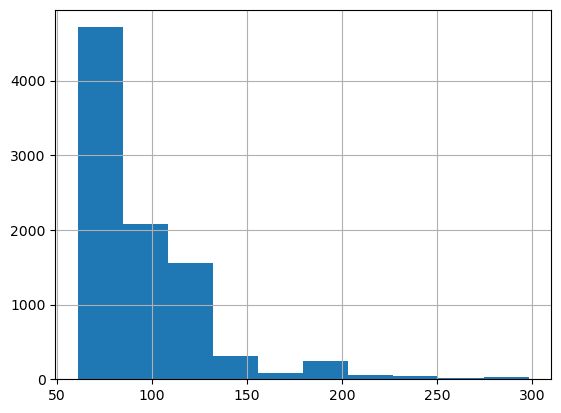

In [13]:
data['monthly premium auto'].hist()
#exponential distribution

In [23]:
data_logged = np.log(data['monthly premium auto'])

<Axes: >

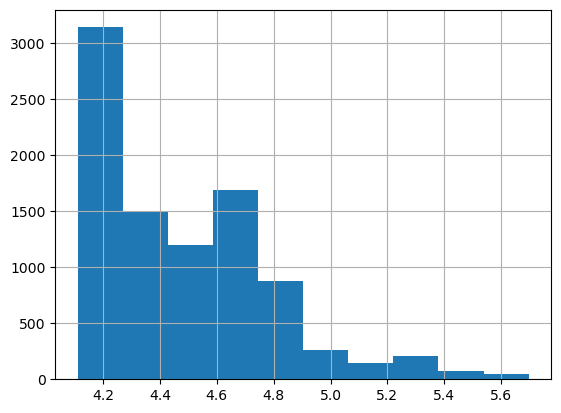

In [24]:
data_logged.hist()

<Axes: >

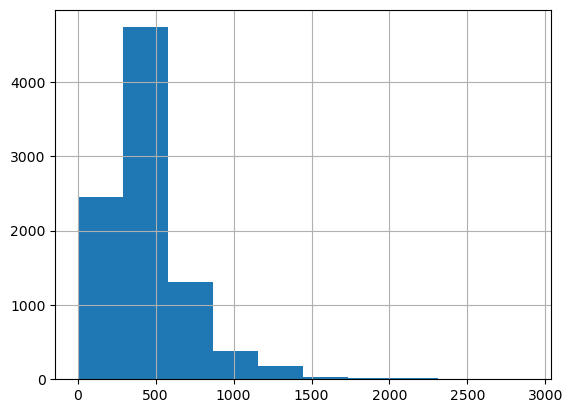

In [14]:
data['total claim amount'].hist()
#theoretical normal distribution

In [25]:
data_logged2 = np.log(data['total claim amount'])

<Axes: >

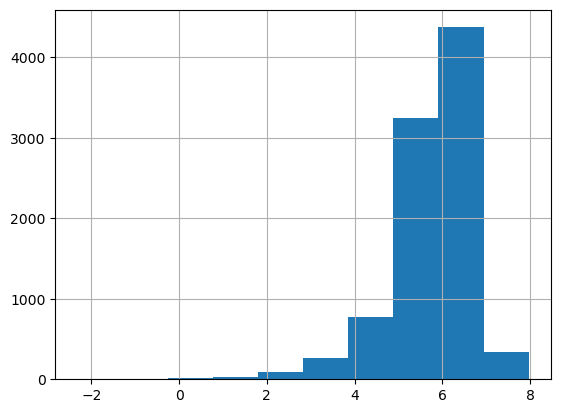

In [27]:
data_logged2.hist()

<Axes: >

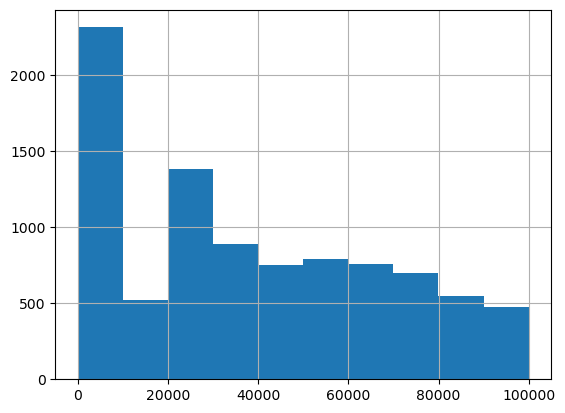

In [6]:
data['income'].hist()
#exponential distribution

In [7]:
data['income'].mean()

37657.38000875848

In [8]:
data['income'].describe().T

count     9134.000000
mean     37657.380009
std      30379.904734
min          0.000000
25%          0.000000
50%      33889.500000
75%      62320.000000
max      99981.000000
Name: income, dtype: float64

In [12]:
binom.pmf(3,           5,                                   0.5)
# pmf = probability mass function
#P(x>1) = P(x=2)+P(x=3)...+P(x=5)
P_more_than_1 = binom.pmf(2,5,0.5)+binom.pmf(3,5,0.5)+binom.pmf(4,5,0.5)+binom.pmf(5,5,0.5)
P_more_than_1 = sum([binom.pmf(x,5,0.5) for x in range(2,6)])
P_more_than_1
#P(x>1) = 1- ((P(x=0)+P(x=1))

P_greater_than_one = 1 - sum([binom.pmf(x,5,.5) for x in range(2)])
P_greater_than_one

0.8125

In [ ]:
from scipy.stats import geom
# chance of needing | trials for first success, when P_success = |
#                   v                                            v
geom.pmf(           4,                                          1/6)
sum([geom.pmf(x, 1/3.5e06) for x in range(100000)])

In [ ]:
((5/6)**(n-1))*1/6

In [ ]:
from scipy.stats import uniform
#      uniform between | and that +|
#                      v           v
uniform.cdf(180,      0,          360)# cdf = continuous distribution fuction
#              ^
#give me P(x<= |)


In [11]:
from scipy.stats import norm
# P(x <= |), for normal dist with mean    | and stddev |)
#        v                                v            v
norm.cdf(36000, 37657.38, 30379.90) - norm.cdf(40000, 37657.38,         30379.90)

-0.05248588499568957